# TASK

# WEB SCRAPING

In [23]:
# Importing BeautifulSoup Library for pulling data out of HTML files.

from bs4 import BeautifulSoup
import requests

In [24]:
# Specifing the URL of the webpage to be scraped
url = 'https://en.wikipedia.org/wiki/List_of_international_cricket_centuries_at_Lord%27s'

# Using the HTML parser to analyse the HTML content retrieved from the webpage
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of international cricket centuries at Lord's - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clie

In [26]:
# Accessing the table from the HTML code
table = soup.find('table', class_ = 'wikitable sortable')
print(table)

<table class="wikitable sortable" style="font-size:95%">
<tbody><tr>
<th>No.</th>
<th>Score</th>
<th>Player</th>
<th>Team</th>
<th>Balls</th>
<th>Inns.</th>
<th>Opposing team</th>
<th>Date</th>
<th>Result
</th></tr>
<tr>
<td>1</td>
<td><span data-sort-value="7003148000000000000♠" style="display:none"></span> 148</td>
<td><span data-sort-value="Steel, A. G."><span class="vcard"><span class="fn"><a href="/wiki/A._G._Steel" title="A. G. Steel">A. G. Steel</a></span></span></span></td>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="480" data-file-width="800" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/en/thumb/b/be/Flag_of_England.svg/23px-Flag_of_England.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/b/be/Flag_of_England.svg/35px-Flag_of_England.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/b/be/Flag_of_England.svg/46px-Flag_of_England.svg.png 2x" width="23"/

In [27]:
# Finding the column headers using the 'th' tag
table_titles = table.find_all('th')
table_titles

[<th>No.</th>,
 <th>Score</th>,
 <th>Player</th>,
 <th>Team</th>,
 <th>Balls</th>,
 <th>Inns.</th>,
 <th>Opposing team</th>,
 <th>Date</th>,
 <th>Result
 </th>]

In [28]:
# Extracting the text from the list of elements 
table_headers = [title.text.strip() for title in table_titles]
print(table_headers)

['No.', 'Score', 'Player', 'Team', 'Balls', 'Inns.', 'Opposing team', 'Date', 'Result']


In [29]:
# Importing Pandas and creating a dataframe 
import pandas as pd 
df = pd.DataFrame(columns = table_headers)
df

,No.,Score,Player,Team,Balls,Inns.,Opposing team,Date,Result


In [30]:
# Extracting the text content from each cell of the row and appending the data to the dataframe
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [title.text.strip() for title in row_data]
    length = len(df)
    df.loc[length] = individual_row_data
df

,No.,Score,Player,Team,Balls,Inns.,Opposing team,Date,Result
0,1,148,A. G. Steel,England,NR,2,Australia,21 July 1884,Won
1,2,164,Arthur Shrewsbury (1/2),England,NR,1,Australia,19 July 1886,Won
2,3,106,Arthur Shrewsbury (2/2),England,NR,1,Australia,17 July 1893,Drawn
3,4,107,Harry Graham,Australia,NR,2,England,17 July 1893,Drawn
4,5,143,Harry Trott,Australia,NR,3,England,22 June 1896,Lost
...,...,...,...,...,...,...,...,...,...
243,244,115*,Joe Root (5/5),England,170,4,New Zealand,2 June 2022,Won
244,245,182,Ben Duckett,England,178,2,Ireland,1 June 2023,Won
245,246,205,Ollie Pope,England,208,2,Ireland,1 June 2023,Won
246,247,110,Steve Smith (2/2),Australia,184,1,England,28 June 2023,Won


In [31]:
# Exporting the dataframe to a CSV file
df.to_csv(r'C:\Users\PRAVEEN\OneDrive\Desktop\PSQL\Cricket.csv', index = False)

# DATA ANALYSIS 

In [48]:
# QUERY 1 : List the teams along with their number of players who scored a test century at Lord's

q1 = df.groupby('Team')['Player'].count().reset_index()
q1.columns = ['Team', 'No. of players']
q1 = q1.sort_values(by='No. of players', ascending=False)
print(q1.to_string(index=False))

        Team  No. of players
     England             137
   Australia              34
 West Indies              18
 New Zealand              16
South Africa              14
       India              12
   Sri Lanka               9
    Pakistan               7
  Bangladesh               1


In [92]:
# QUERY 2 : List all the indian players who scored a test century at Lord's

q2 = df[df['Team'] == 'India']['Player']
print(q2.to_string(index=False))

          Vinoo Mankad
Dilip Vengsarkar (1/3)
    Gundappa Viswanath
Dilip Vengsarkar (2/3)
Dilip Vengsarkar (3/3)
          Ravi Shastri
   Mohammad Azharuddin
        Sourav Ganguly
          Ajit Agarkar
          Rahul Dravid
        Ajinkya Rahane
           K. L. Rahul


In [59]:
# QUERY 3 : List the maximum and minimum runs scored by the player and also specify the team, date, opposing team and score

max_score = df[df['Score'] == df['Score'].max()]
max_score_info = max_score[['Player', 'Team', 'Date', 'Opposing team', 'Score']]
min_score = df[df['Score'] == df['Score'].min()]
min_score_info = min_score[['Player', 'Team', 'Date', 'Opposing team', 'Score']]
print("Maximum Score:")
print(max_score_info.to_string(index=False))
print('\n')
print("\nMinimum Score:")
print(min_score_info.to_string(index=False))


Maximum Score:
            Player    Team         Date Opposing team Score
Graham Gooch (4/6) England 26 July 1990         India   333



Minimum Score:
                 Player        Team         Date Opposing team Score
Herbert Sutcliffe (2/2)     England 29 June 1929  South Africa   100
           Ravi Shastri       India 26 July 1990       England   100
             Matt Horne New Zealand 22 July 1999       England   100
  Michael Vaughan (2/6)     England 25 July 2002         India   100


In [93]:
# QUERY 4 : What is the winning percantage for India against England at Lord's when there is a century by an indian batsman

df['Result'] = df['Result'].str.strip()
ind_eng = df[(df['Team'] == 'India') & (df['Opposing team'] == 'England')]
total_matches = ind_eng.shape[0]
wins = ind_eng[ind_eng['Result'] == 'Won'].shape[0]
win_percentage = (wins / total_matches) * 100
print(f"Win Percentage for India against England: {win_percentage:.2f}%")

Win Percentage for India against England: 25.00%


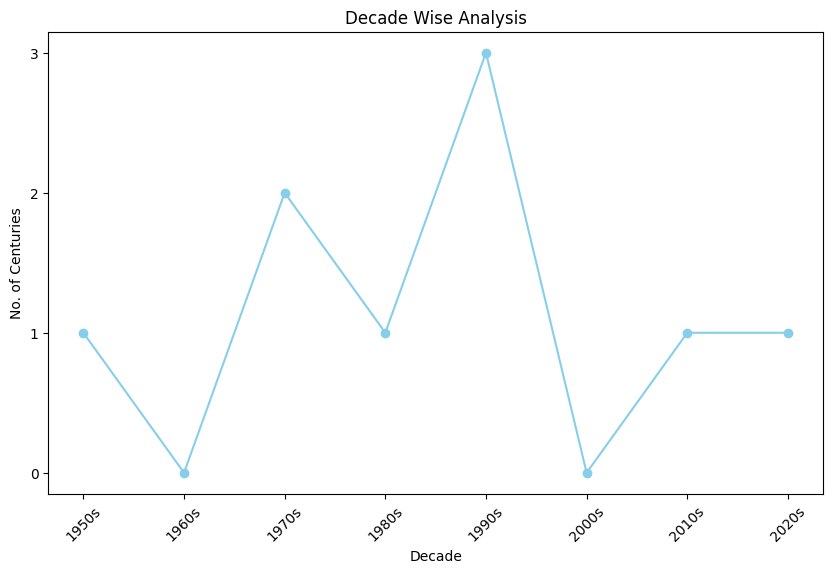

In [94]:
# QUERY 5: Give a decade wise analysis of the centuries scored by indian batsmen during India vs England matches 

import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
india_vs_england = df[(df['Team'] == 'India') & (df['Opposing team'] == 'England')]
india_vs_england.loc[:, 'Decade'] = (india_vs_england['Date'].dt.year // 10) * 10
decade_counts = india_vs_england['Score'].groupby(india_vs_england['Decade']).count().reset_index()
decade_counts.columns = ['Decade', 'Count']
decade_counts['DecadeLabel'] = decade_counts['Decade'].astype(str) + 's'
years_to_display = list(range(1950, 2030, 10))
all_years_df = pd.DataFrame({'Decade': years_to_display})
merged_df = pd.merge(all_years_df, decade_counts, on='Decade', how='left').fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(merged_df['Decade'], merged_df['Count'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('No. of Centuries')
plt.title('Decade Wise Analysis')
plt.xticks(merged_df['Decade'], [f"{int(year)}s" for year in merged_df['Decade']], rotation=45)
plt.yticks(range(0, int(max(merged_df['Count'])) + 1))
plt.show()